# Test sample: XB47Y
sweet leaf - Black Sabbath

In [1]:
%load_ext autoreload
%autoreload 2
import tools_EEG as TEEG

1. open all the .mat files inside a single patient
2. create plot of "presence"
3. find matching onset times
4. start pre-process pipeline for each .mat. Make them unique first
5. Generate plot for each of them and save it on specific folder with their name results/file_name/pre_processplots?/*.csv

In [2]:
# open all the .mat files from the folder of a single patient
# create a df with all the information
path = "//home/tperezsanchez/FoundationModel_EEG_Dissertation/EEG_data_vis/data/Working/XB47Y/"
df_XB47Y, error_list = TEEG.process_eeg_mat_files(path)
print(df_XB47Y.head())

--- Processing Summary ---
Successfully processed: 183
Errors encountered: 0
Total significant gaps (>1s): 78
   list_idx          file                  T0                         TF  \
0       112  XB47Y_35.mat 2019-10-29 09:31:04 2019-10-29 10:01:00.730450   
1       114  XB47Y_37.mat 2019-10-29 19:54:13 2019-10-30 01:54:12.759550   
2       115  XB47Y_38.mat 2019-10-30 01:54:13 2019-10-30 04:58:50.338150   
3       181  XB47Y_98.mat 2019-10-30 07:47:44 2019-10-30 13:47:44.759400   
4       182  XB47Y_99.mat 2019-10-30 13:47:44 2019-10-30 19:47:44.759400   

    duration_s        gap_s  
0   1796.73045      0.00000  
1  21599.75955  35592.26955  
2  11077.33815      0.24045  
3  21600.75940  10133.66185  
4  21600.75940     -0.75940  


--- Statistics per Day ---
Days analyzed : 46
Mean duration : 17.58 h
Median        : 19.32 h
Min / Max     : 0.02 / 26.39 h


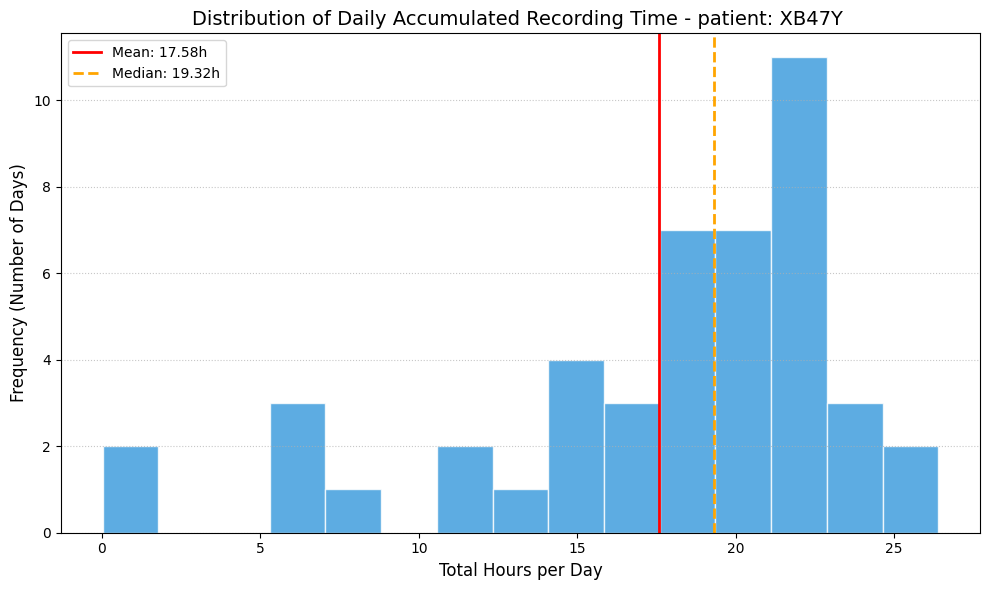

In [3]:

# HISTORGRAM recording duration per day
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# --- 1. Preparación ---
df_use = df_XB47Y.copy()

# Aseguramos que T0 sea datetime
df_use['T0'] = pd.to_datetime(df_use['T0'])

# --- 2. Agrupación por día ---
# Usamos 'T0' para extraer la fecha y sumamos la duración en segundos
df_daily = df_use.groupby(df_use['T0'].dt.date)['duration_s'].sum().reset_index()

# Renombramos para claridad
df_daily.columns = ['date', 'total_duration_s']

# Convertir el acumulado diario a horas
df_daily["hours_accumulated"] = df_daily["total_duration_s"] / 3600.0

# --- 3. Estadísticas ---
mean_h = df_daily["hours_accumulated"].mean()
median_h = df_daily["hours_accumulated"].median()

print(f"--- Statistics per Day ---")
print(f"Days analyzed : {len(df_daily)}")
print(f"Mean duration : {mean_h:.2f} h")
print(f"Median        : {median_h:.2f} h")
print(f"Min / Max     : {df_daily['hours_accumulated'].min():.2f} / {df_daily['hours_accumulated'].max():.2f} h")

# --- 4. Histograma ---
plt.figure(figsize=(10, 6))
# Ajustamos bins a 10 o 15 ya que suele haber menos días que archivos
plt.hist(df_daily["hours_accumulated"], bins=15, color="#3498db", edgecolor="white", alpha=0.8)

# Líneas de referencia
plt.axvline(mean_h, color="red", linestyle='-', linewidth=2, label=f"Mean: {mean_h:.2f}h")
plt.axvline(median_h, color="orange", linestyle='--', linewidth=2, label=f"Median: {median_h:.2f}h")

plt.title("Distribution of Daily Accumulated Recording Time - patient: XB47Y ", fontsize=14)
plt.xlabel("Total Hours per Day", fontsize=12)
plt.ylabel("Frequency (Number of Days)", fontsize=12)
plt.legend()
plt.grid(axis='y', linestyle=':', alpha=0.7)

plt.tight_layout()
plt.show()

In [6]:

file_path = "/home/tperezsanchez/FoundationModel_EEG_Dissertation/EEG_data_vis/data/Working/XB47Y/XB47Y_seizures.xlsx"
df_sq, df_di = TEEG.preprocess_seizure_data(file_path)

Processing Patient: XB47Y
Output directory: /home/tperezsanchez/FoundationModel_EEG_Dissertation/EEG_data_vis/data/Working/XB47Y/preprocessCSV_XB47Y
Successfully saved: 
 - sqEEG.csv 
 - diary.csv


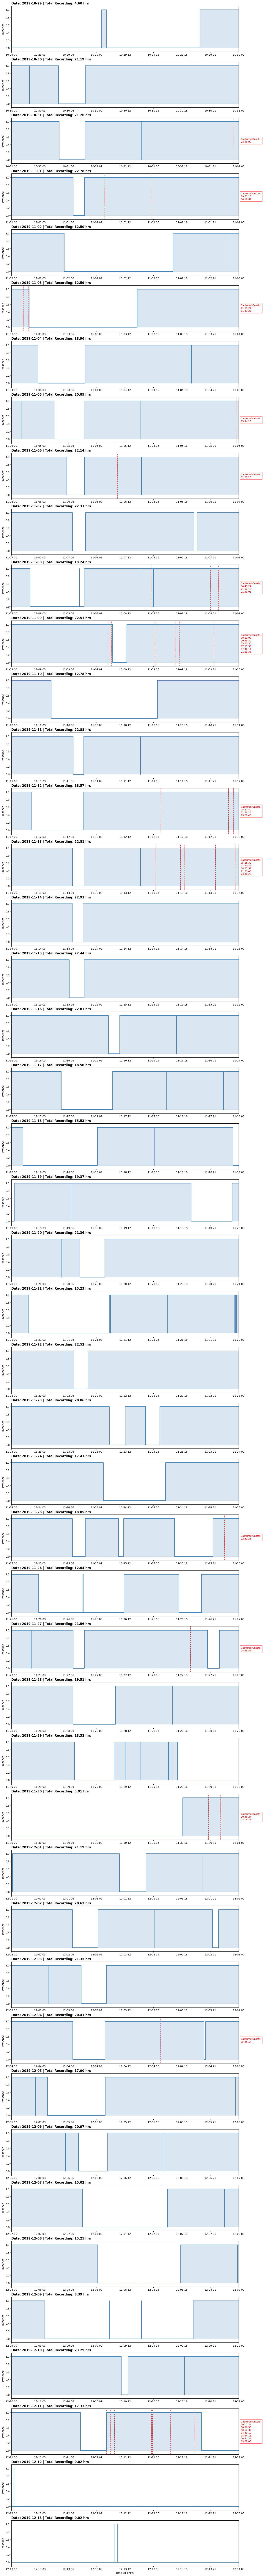

In [7]:
df_matches = TEEG.plot_eeg_availability_with_onsetsV2(
    df_files=df_XB47Y, 
    df_onsets=df_sq, 
    output_path="/home/tperezsanchez/FoundationModel_EEG_Dissertation/EEG_data_vis/results/XB47Y_MAPWITHSEIZ.png",
    show_plot=True
)

In [8]:
#search for the mat file with the onset on the 2019-12-11
import pandas as pd

# 1. Ensure T0 is in datetime format (just in case)
df_matches['T0'] = pd.to_datetime(df_matches['T0'])

# 2. Filter by comparing only the date part (.dt.date)
# Note: both pd.Timestamp or datetime.date objects work for this comparison
target_date = pd.to_datetime("2019-12-11").date()
df_filtered = df_matches[df_matches['T0'].dt.date == target_date]

# Show results
print(f"Found {len(df_filtered)} records for the date: {target_date}")
display(df_filtered)

Found 7 records for the date: 2019-12-11


,onset,list_idx,file,T0,TF,duration_s,gap_s,captured
29,2019-12-11 10:02:37.652,91,XB47Y_181.mat,2019-12-11 10:00:59,2019-12-11 16:00:59.759400,21600.7594,9872.0024,True
30,2019-12-11 10:26:56.951,91,XB47Y_181.mat,2019-12-11 10:00:59,2019-12-11 16:00:59.759400,21600.7594,9872.0024,True
31,2019-12-11 10:52:32.102,91,XB47Y_181.mat,2019-12-11 10:00:59,2019-12-11 16:00:59.759400,21600.7594,9872.0024,True
32,2019-12-11 14:48:10.356,91,XB47Y_181.mat,2019-12-11 10:00:59,2019-12-11 16:00:59.759400,21600.7594,9872.0024,True
33,2019-12-11 14:54:11.513,91,XB47Y_181.mat,2019-12-11 10:00:59,2019-12-11 16:00:59.759400,21600.7594,9872.0024,True
34,2019-12-11 16:47:39.659,92,XB47Y_182.mat,2019-12-11 16:00:59,2019-12-11 20:03:56.813000,14577.8130,-0.7594,True
35,2019-12-11 19:22:08.918,92,XB47Y_182.mat,2019-12-11 16:00:59,2019-12-11 20:03:56.813000,14577.8130,-0.7594,True


In [9]:
#df_matches
df_Unique_match = df_matches['file'].unique()
df_Unique_match
for file in df_Unique_match:
    print(file)

XB47Y_41.mat
XB47Y_102.mat
XB47Y_103.mat
XB47Y_44.mat
XB47Y_51.mat
XB47Y_110.mat
XB47Y_54.mat
XB47Y_56.mat
XB47Y_58.mat
XB47Y_59.mat
XB47Y_60.mat
XB47Y_122.mat
XB47Y_123.mat
XB47Y_67.mat
XB47Y_68.mat
XB47Y_148.mat
XB47Y_150.mat
XB47Y_9.mat
XB47Y_18.mat
XB47Y_181.mat
XB47Y_182.mat


## Pre-process pipeline start only with files where the onset is present

1. open each .mat file from the unique df
2. artifact removal/ cut
3. Band pass (check Pedro's paper, they specified sth about a band-pass
4. windows 10s
5. Z-score?


In [ ]:
# open mat files 


--- Processing file: XB47Y_181.mat ---
Saved EEG data to: /home/tperezsanchez/FoundationModel_EEG_Dissertation/EEG_data_vis/results/XB47Y_test2202204/XB47Y_181.npz
Shape: (4472028, 2)
Sampling frequency: 207.0310546581987 Hz


<Figure size 1200x800 with 0 Axes>

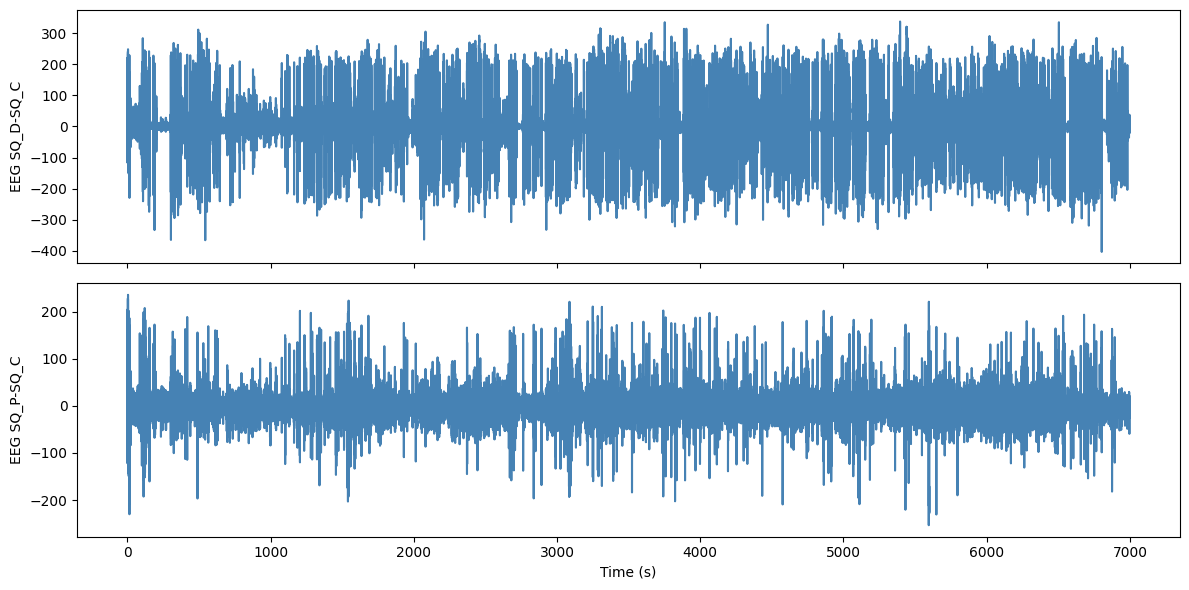

<Figure size 1200x800 with 0 Axes>

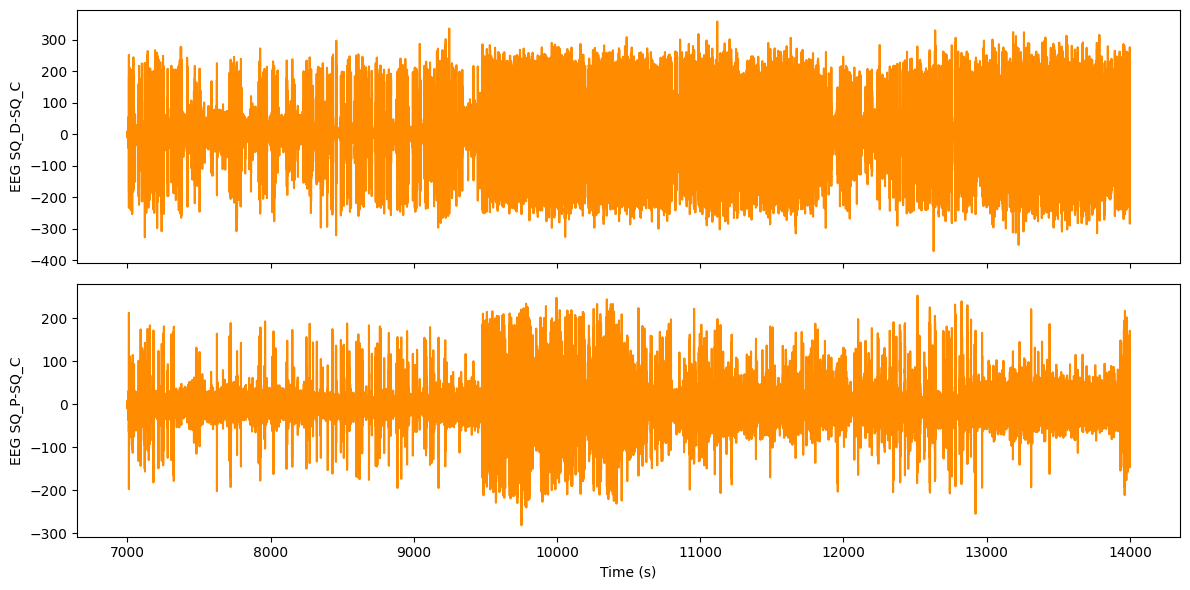

<Figure size 1200x800 with 0 Axes>

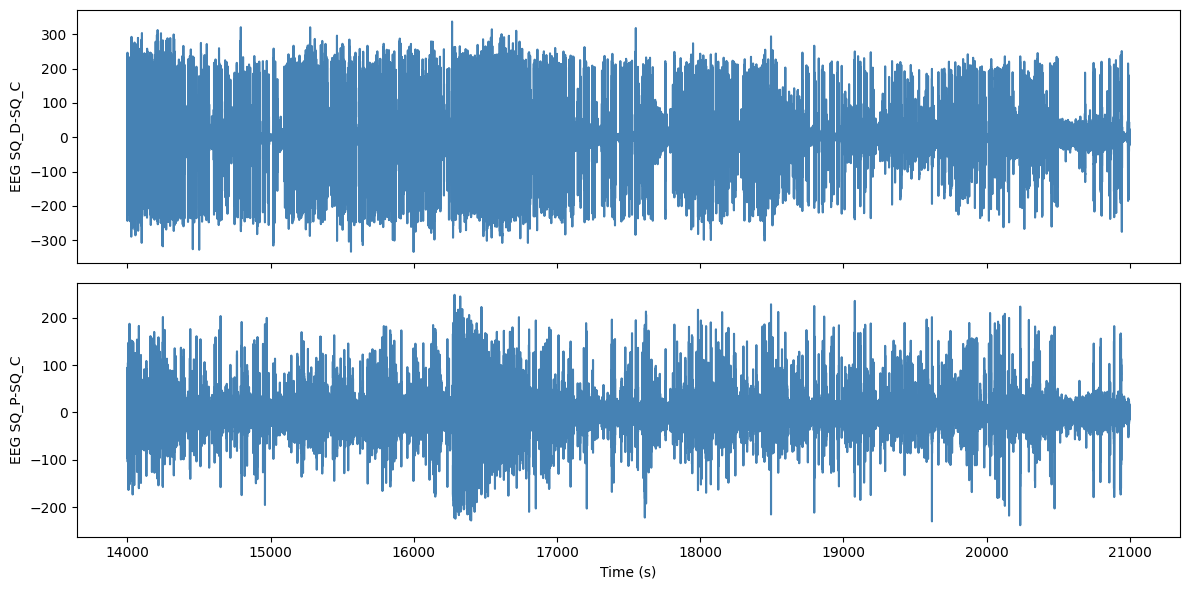

Successfully finished: XB47Y_181

--- Processing file: XB47Y_182.mat ---
Saved EEG data to: /home/tperezsanchez/FoundationModel_EEG_Dissertation/EEG_data_vis/results/XB47Y_test2202204/XB47Y_182.npz
Shape: (3018060, 2)
Sampling frequency: 207.0310546581987 Hz


<Figure size 1200x800 with 0 Axes>

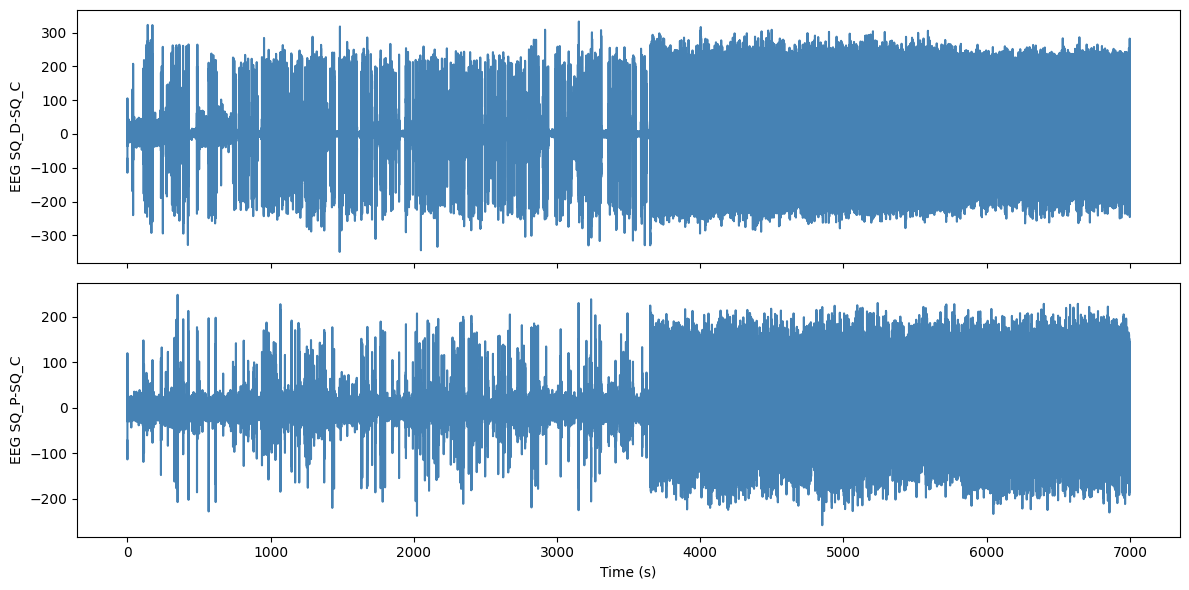

<Figure size 1200x800 with 0 Axes>

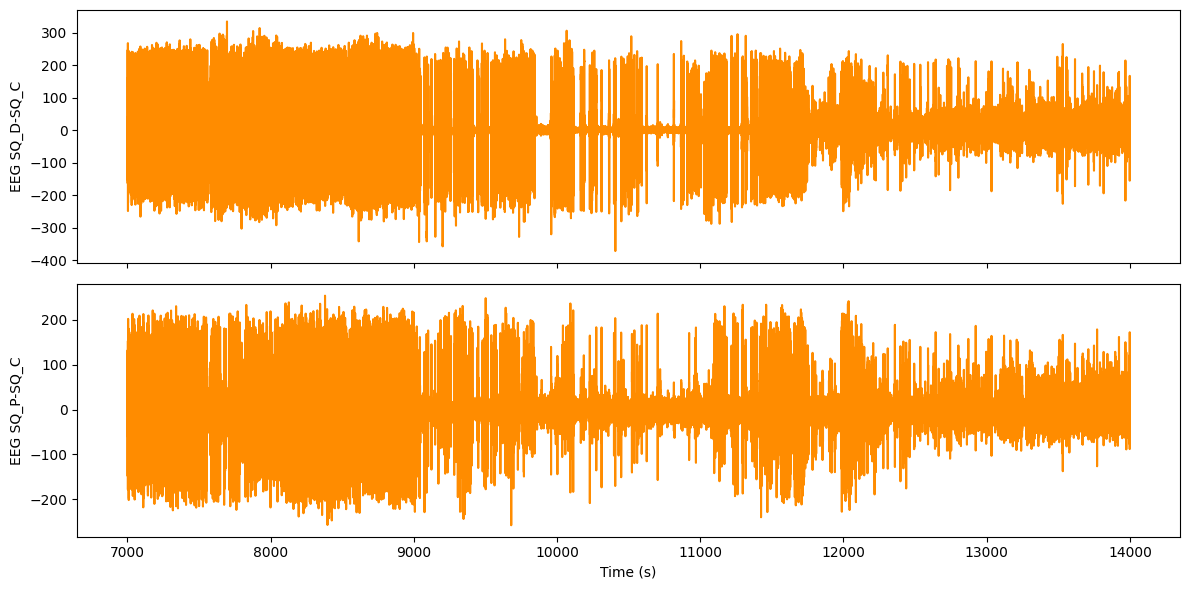

Successfully finished: XB47Y_182

All specified files processed!


In [17]:
# HARD CODE INTO THE 182 AND 181, JUST TO SEE HOW THEY LOOK
import os
import scipy.io as sio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Configuración de rutas
input_dir = "/home/tperezsanchez/FoundationModel_EEG_Dissertation/EEG_data_vis/data/Working/XB47Y/"
output_dir = "/home/tperezsanchez/FoundationModel_EEG_Dissertation/EEG_data_vis/results/XB47Y_test2202204/"
plots_dir = os.path.join(output_dir, "plots")

os.makedirs(output_dir, exist_ok=True)
os.makedirs(plots_dir, exist_ok=True)

# --- CAMBIO AQUÍ: Lista de archivos específicos ---
files_to_process = ["XB47Y_181.mat", "XB47Y_182.mat"]

# 2. Bucle para procesar cada archivo en la lista
for file_name in files_to_process:
    mat_path = os.path.join(input_dir, file_name)
    base_name = os.path.splitext(file_name)[0]

    if os.path.exists(mat_path):
        try:
            # CARGAR ARCHIVO MAT
            mat_contents = sio.loadmat(mat_path)
            header_dict = mat_contents['hdr'] 
            print(f"\n--- Processing file: {file_name} ---")
            
            # A. Convertir .mat a Dataframe
            _, path, df_eeg = TEEG.build_eeg_array_from_mat(
                hdr=header_dict,
                mat_data=mat_contents,
                output_dir=output_dir,
                file_prefix=base_name,
                save_format="npz",
                return_dataframe=True
            )

            # B. Ventaneo y Filtrado
            start_time = df_eeg["Time"].min()
            end_time = df_eeg["Time"].max()
            current_start = start_time
            window_size = 7000
            colors = ["steelblue", "darkorange"]
            color_idx = 0

            while current_start + window_size <= end_time:
                current_end = current_start + window_size
                
                # 1. Aplicar Cutoff
                df_win_cut = TEEG.apply_amplitude_cutoff(
                    df_eeg, threshold=200, 
                    start_sec=current_start, end_sec=current_end
                )

                # 2. Filtro Bandpass
                df_win_idx = df_win_cut.set_index("Time")
                df_win_filt, fs = TEEG.bandpass_filter_eegwin(
                    df_win_idx, lowcut=0.5, highcut=40, order=4
                )

                # 3. Graficar
                plt.figure(figsize=(12, 8))
                TEEG.plot_eeg_signals(
                    df_win_filt.reset_index(), 
                    color=colors[color_idx]
                )
                
                # Añadir nombre del archivo al título para no confundirlos
                plt.title(f"File: {base_name} | Start: {int(current_start)}s")
                
                plot_filename = f"{base_name}_win_{int(current_start)}s.png"
                plt.savefig(os.path.join(plots_dir, plot_filename), dpi=150)
                plt.close() 

                color_idx = 1 - color_idx
                current_start += window_size

            print(f"Successfully finished: {base_name}")

        except Exception as e:
            print(f"Error processing {file_name}: {e}")
    else:
        print(f"File not found, skipping: {mat_path}")

print("\nAll specified files processed!")


--- Processing file: XB47Y_181.mat ---
Saved EEG data to: /home/tperezsanchez/FoundationModel_EEG_Dissertation/EEG_data_vis/results/XB47Y_test2202204/XB47Y_181.npz
Shape: (4472028, 2)
Sampling frequency: 207.0310546581987 Hz
Valores RAW - Min: -1374.208984375, Max: 1373.5379638671875


<Figure size 1500x700 with 0 Axes>

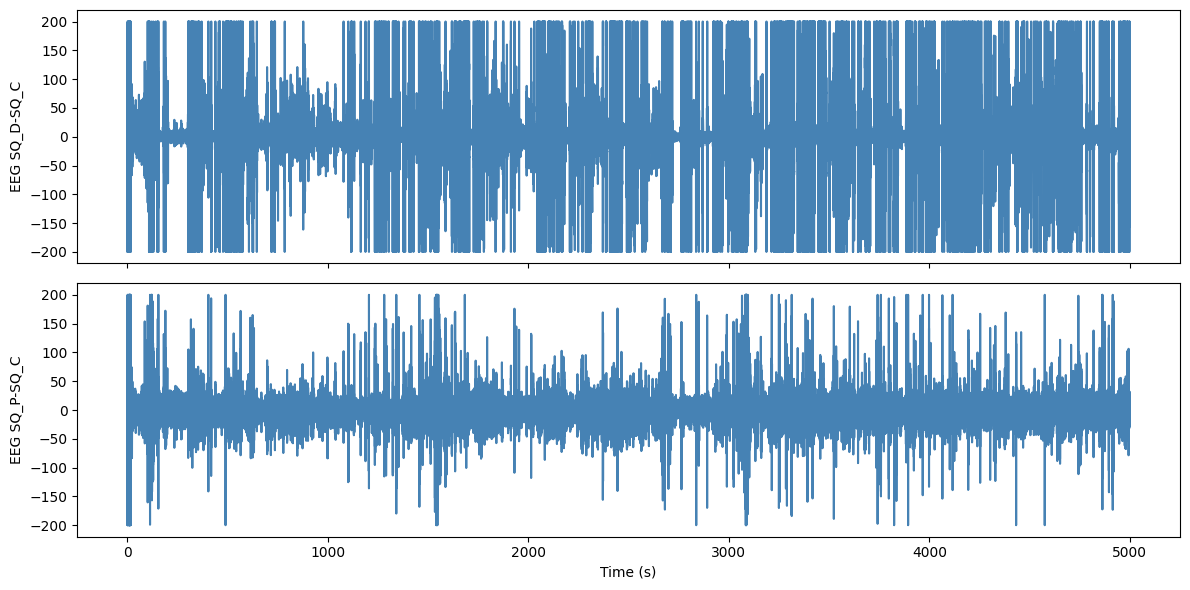

Valores FILTRADOS - Min: -200.0, Max: 200.0


<Figure size 1500x700 with 0 Axes>

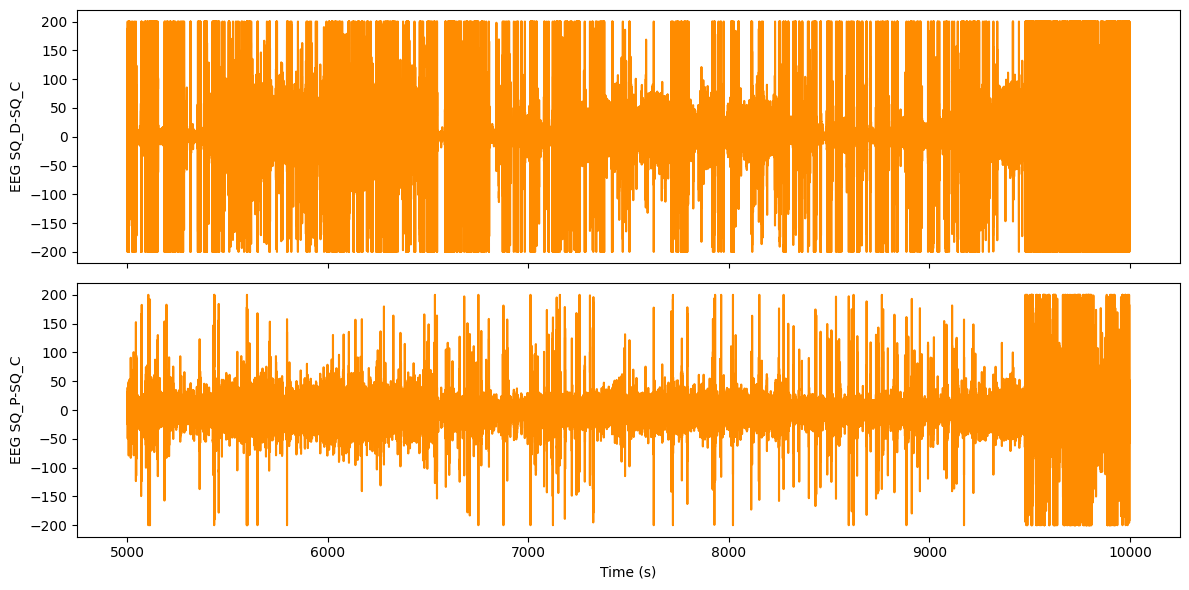

Valores FILTRADOS - Min: -200.0, Max: 200.0


<Figure size 1500x700 with 0 Axes>

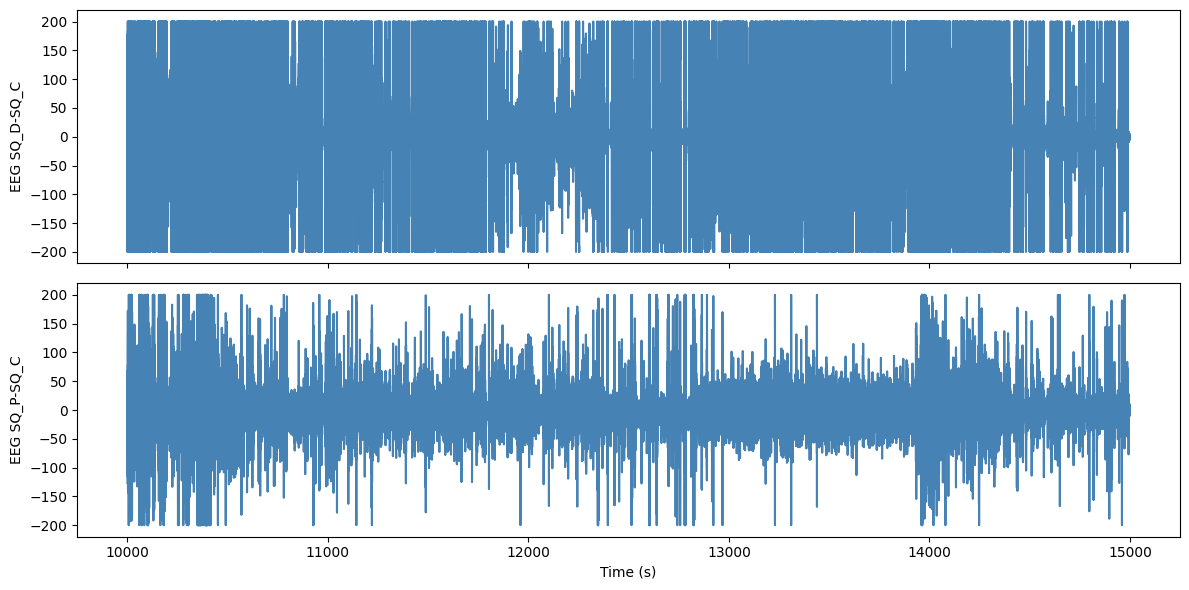

Valores FILTRADOS - Min: -200.0, Max: 200.0


<Figure size 1500x700 with 0 Axes>

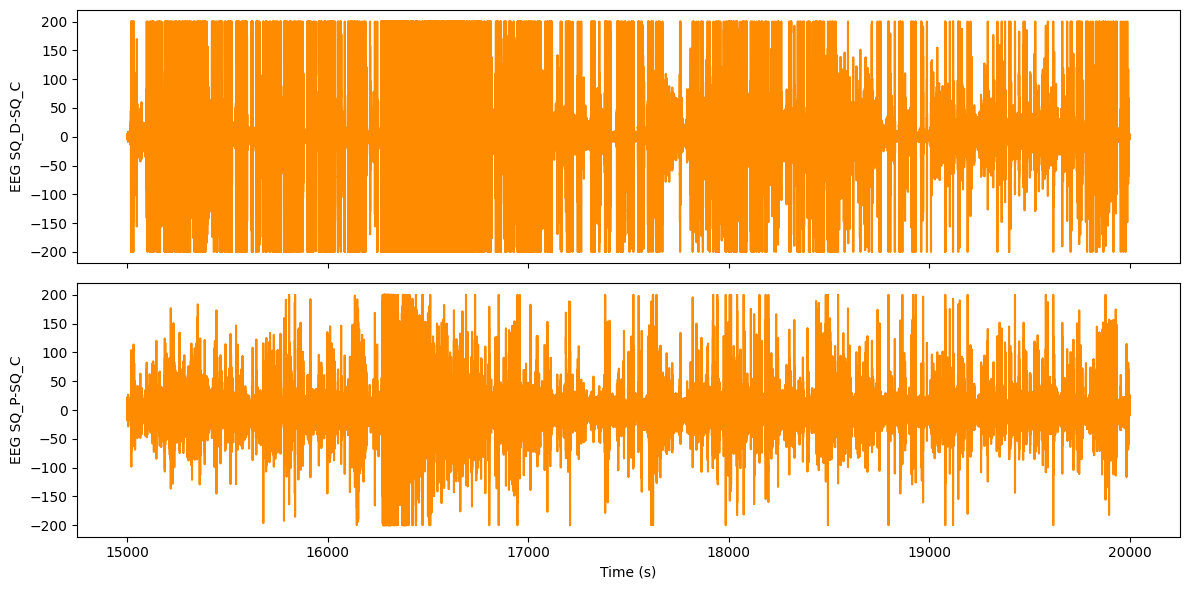

Valores FILTRADOS - Min: -200.0, Max: 200.0
Successfully finished: XB47Y_181

--- Processing file: XB47Y_182.mat ---
Saved EEG data to: /home/tperezsanchez/FoundationModel_EEG_Dissertation/EEG_data_vis/results/XB47Y_test2202204/XB47Y_182.npz
Shape: (3018060, 2)
Sampling frequency: 207.0310546581987 Hz
Valores RAW - Min: -1374.208984375, Max: 350.26226806640625


<Figure size 1500x700 with 0 Axes>

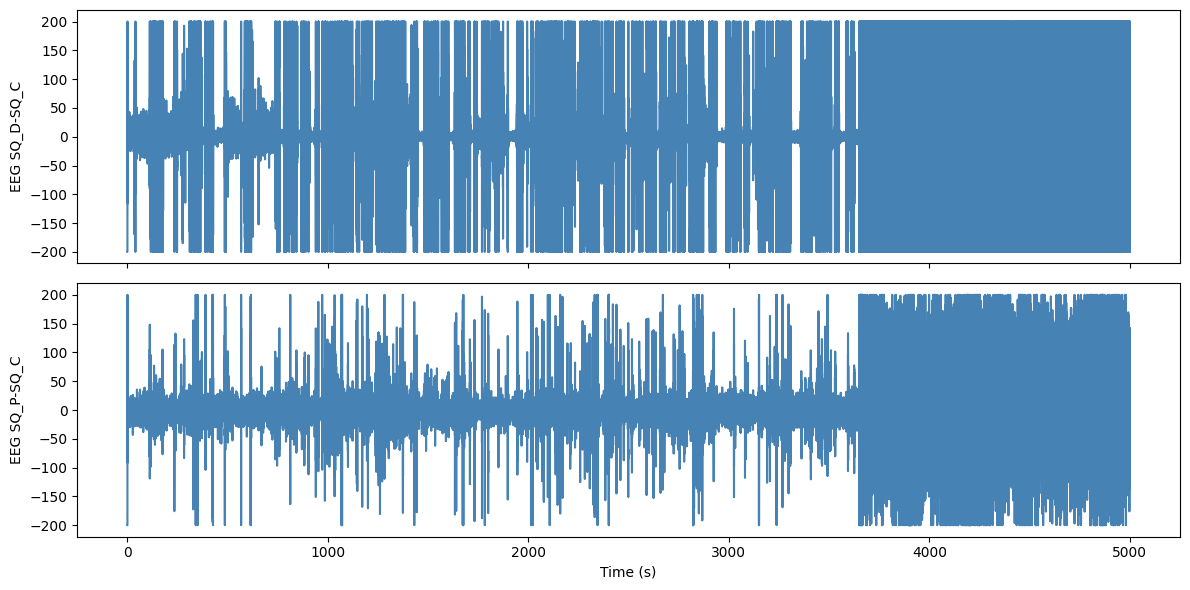

Valores FILTRADOS - Min: -200.0, Max: 200.0


<Figure size 1500x700 with 0 Axes>

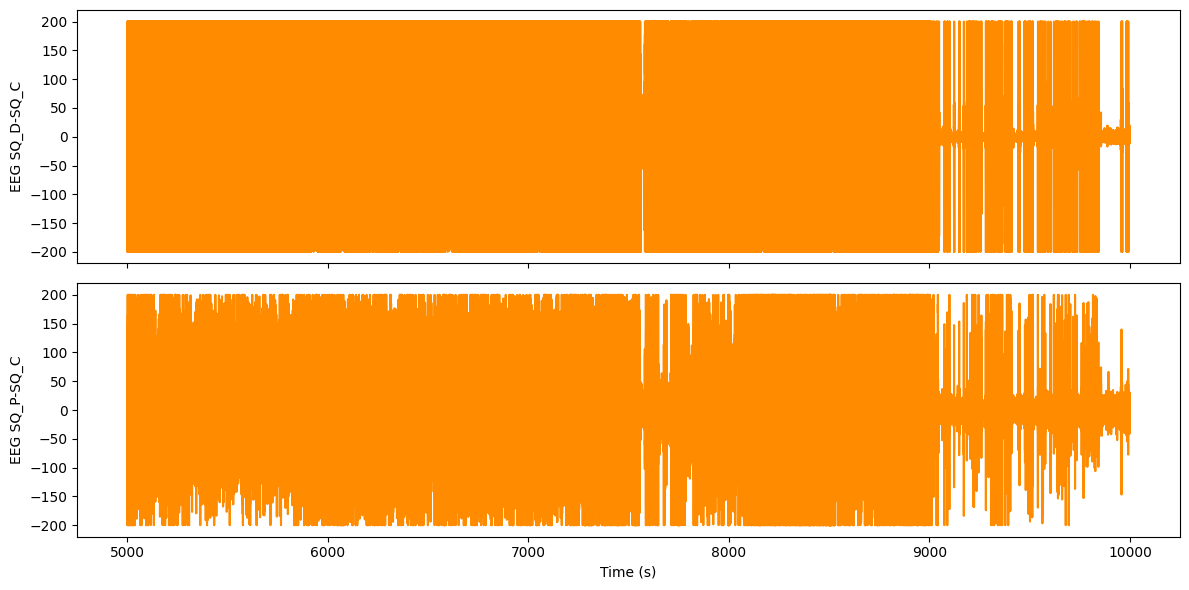

Valores FILTRADOS - Min: -200.0, Max: 200.0
Successfully finished: XB47Y_182

All specified files processed!


In [20]:
# HARD CODE INTO THE 182 AND 181, JUST TO SEE HOW THEY LOOK
import os
import scipy.io as sio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Configuración de rutas
input_dir = "/home/tperezsanchez/FoundationModel_EEG_Dissertation/EEG_data_vis/data/Working/XB47Y/"
output_dir = "/home/tperezsanchez/FoundationModel_EEG_Dissertation/EEG_data_vis/results/XB47Y_test2202204/"
plots_dir = os.path.join(output_dir, "plots")

os.makedirs(output_dir, exist_ok=True)
os.makedirs(plots_dir, exist_ok=True)

# --- CAMBIO AQUÍ: Lista de archivos específicos ---
files_to_process = ["XB47Y_181.mat", "XB47Y_182.mat"]

# 2. Bucle para procesar cada archivo en la lista
for file_name in files_to_process:
    mat_path = os.path.join(input_dir, file_name)
    base_name = os.path.splitext(file_name)[0]

    if os.path.exists(mat_path):
        try:
            # CARGAR ARCHIVO MAT
            mat_contents = sio.loadmat(mat_path)
            header_dict = mat_contents['hdr'] 
            print(f"\n--- Processing file: {file_name} ---")
            
            # A. Convertir .mat a Dataframe
            _, path, df_eeg = TEEG.build_eeg_array_from_mat(
                hdr=header_dict,
                mat_data=mat_contents,
                output_dir=output_dir,
                file_prefix=base_name,
                save_format="npz",
                return_dataframe=True
            )
            print(f"Valores RAW - Min: {df_eeg.iloc[:, 1:].min().min()}, Max: {df_eeg.iloc[:, 1:].max().max()}")
# --- B. Ventaneo y Filtrado (CORREGIDO) ---
            start_time = df_eeg["Time"].min()
            end_time = df_eeg["Time"].max()
            
            # Calculamos la duración total para que procese toda la señal de una vez
            total_duration = end_time - start_time
            window_size = 5000  
            
            current_start = start_time
            colors = ["steelblue", "darkorange"]
            color_idx = 0

            # Usamos un pequeño margen (+0.1) para evitar errores de precisión decimal
            while current_start + window_size <= end_time + 0.1:
                current_end = current_start + window_size
                
                # 1. Extraer el segmento de tiempo actual
                df_segment = df_eeg[(df_eeg["Time"] >= current_start) & (df_eeg["Time"] <= current_end)].copy()
                
                # 2. Filtro Bandpass (Se recomienda antes del cutoff para evitar ruidos de alta frecuencia)
                df_win_idx = df_segment.set_index("Time")
                df_win_filt, fs = TEEG.bandpass_filter_eegwin(
                    df_win_idx, lowcut=0.5, highcut=40, order=4
                )

                # 3. Aplicar Cutoff (Artifact Removal sobre la señal ya filtrada)
                # Nota: reseteamos index para que la función encuentre la columna 'Time'
                df_final = TEEG.apply_amplitude_cutoff(
                    df_win_filt.reset_index(), 
                    threshold=200, 
                    start_sec=current_start, 
                    end_sec=current_end
                )

                # 4. Graficar
                plt.figure(figsize=(15, 7)) # Un poco más ancho para señales largas
                TEEG.plot_eeg_signals(
                    df_final, 
                    color=colors[color_idx]
                )
                
                plt.title(f"Archivo: {base_name} | Duración: {total_duration:.2f}s | Filtro: 0.5-40Hz")
                plt.xlabel("Tiempo (s)")
                plt.tight_layout()
                print(f"Valores FILTRADOS - Min: {df_final.iloc[:, 1:].min().min()}, Max: {df_final.iloc[:, 1:].max().max()}")
                # Guardar el gráfico
                plot_filename = f"{base_name}_full_processed.png"
                plt.savefig(os.path.join(plots_dir, plot_filename), dpi=150)
                plt.close() 

                # Actualizar para el siguiente ciclo (si window_size es total, solo hará uno)
                color_idx = 1 - color_idx
                current_start += window_size

            print(f"Successfully finished: {base_name}")

        except Exception as e:
            print(f"Error processing {file_name}: {e}")
    else:
        print(f"File not found, skipping: {mat_path}")

print("\nAll specified files processed!")

In [ ]:
# HARD CODE INTO THE 182 AND 181, JUST TO SEE HOW THEY LOOK
import os
import scipy.io as sio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Configuración de rutas
input_dir = "/home/tperezsanchez/FoundationModel_EEG_Dissertation/EEG_data_vis/data/Working/XB47Y/"
output_dir = "/home/tperezsanchez/FoundationModel_EEG_Dissertation/EEG_data_vis/results/XB47Y_test2202204/"
plots_dir = os.path.join(output_dir, "plots")

os.makedirs(output_dir, exist_ok=True)
os.makedirs(plots_dir, exist_ok=True)

# --- CAMBIO AQUÍ: Lista de archivos específicos ---
files_to_process = ["XB47Y_181.mat", "XB47Y_182.mat"]

# 2. Bucle para procesar cada archivo en la lista
for file_name in files_to_process:
    mat_path = os.path.join(input_dir, file_name)
    base_name = os.path.splitext(file_name)[0]

    if os.path.exists(mat_path):
        try:
            # CARGAR ARCHIVO MAT
            mat_contents = sio.loadmat(mat_path)
            header_dict = mat_contents['hdr'] 
            print(f"\n--- Processing file: {file_name} ---")
            
            # A. Convertir .mat a Dataframe
            _, path, df_eeg = TEEG.build_eeg_array_from_mat(
                hdr=header_dict,
                mat_data=mat_contents,
                output_dir=output_dir,
                file_prefix=base_name,
                save_format="npz",
                return_dataframe=True
            )
            print(f"Valores RAW - Min: {df_eeg.iloc[:, 1:].min().min()}, Max: {df_eeg.iloc[:, 1:].max().max()}")
# --- B. Ventaneo y Filtrado (CORREGIDO) ---
            start_time = df_eeg["Time"].min()
            end_time = df_eeg["Time"].max()
            
            # Calculamos la duración total para que procese toda la señal de una vez
            total_duration = end_time - start_time
            window_size = 10
            
            current_start = start_time
            colors = ["steelblue", "darkorange"]
            color_idx = 0

            # Usamos un pequeño margen (+0.1) para evitar errores de precisión decimal
            while current_start + window_size <= end_time + 0.1:
                current_end = current_start + window_size
                
                # 1. Extraer el segmento de tiempo actual
                df_segment = df_eeg[(df_eeg["Time"] >= current_start) & (df_eeg["Time"] <= current_end)].copy()
                
                # 2. Filtro Bandpass (Se recomienda antes del cutoff para evitar ruidos de alta frecuencia)
                df_win_idx = df_segment.set_index("Time")
                df_win_filt, fs = TEEG.bandpass_filter_eegwin(
                    df_win_idx, lowcut=0.5, highcut=40, order=4
                )

                # 3. Aplicar Cutoff (Artifact Removal sobre la señal ya filtrada)
                # Nota: reseteamos index para que la función encuentre la columna 'Time'
                df_final = TEEG.apply_amplitude_cutoff(
                    df_win_filt.reset_index(), 
                    threshold=200, 
                    start_sec=current_start, 
                    end_sec=current_end
                )

                # 4. Graficar
                plt.figure(figsize=(15, 7)) # Un poco más ancho para señales largas
                TEEG.plot_eeg_signals(
                    df_final, 
                    color=colors[color_idx]
                )
                
                plt.title(f"Archivo: {base_name} | Duración: {total_duration:.2f}s | Filtro: 0.5-40Hz")
                plt.xlabel("Tiempo (s)")
                plt.tight_layout()
                print(f"Valores FILTRADOS - Min: {df_final.iloc[:, 1:].min().min()}, Max: {df_final.iloc[:, 1:].max().max()}")
                # Guardar el gráfico
                plot_filename = f"{base_name}_full_processed.png"
                plt.savefig(os.path.join(plots_dir, plot_filename), dpi=150)
                plt.close() 

                # Actualizar para el siguiente ciclo (si window_size es total, solo hará uno)
                color_idx = 1 - color_idx
                current_start += window_size

            print(f"Successfully finished: {base_name}")

        except Exception as e:
            print(f"Error processing {file_name}: {e}")
    else:
        print(f"File not found, skipping: {mat_path}")

print("\nAll specified files processed!")

In [ ]:
# same but I remove the artefact first before applying band pass
import os
import scipy.io as sio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Configuración de rutas
input_dir = "/home/tperezsanchez/FoundationModel_EEG_Dissertation/EEG_data_vis/data/Working/XB47Y/"
output_dir = "/home/tperezsanchez/FoundationModel_EEG_Dissertation/EEG_data_vis/results/XB47Y_test2202204/"
plots_dir = os.path.join(output_dir, "plots")

os.makedirs(output_dir, exist_ok=True)
os.makedirs(plots_dir, exist_ok=True)

# --- CAMBIO AQUÍ: Lista de archivos específicos ---
files_to_process = ["XB47Y_181.mat", "XB47Y_182.mat"]

# 2. Bucle para procesar cada archivo en la lista
for file_name in files_to_process:
    mat_path = os.path.join(input_dir, file_name)
    base_name = os.path.splitext(file_name)[0]

    if os.path.exists(mat_path):
        try:
            # CARGAR ARCHIVO MAT
            mat_contents = sio.loadmat(mat_path)
            header_dict = mat_contents['hdr'] 
            print(f"\n--- Processing file: {file_name} ---")
            
            # A. Convertir .mat a Dataframe
            _, path, df_eeg = TEEG.build_eeg_array_from_mat(
                hdr=header_dict,
                mat_data=mat_contents,
                output_dir=output_dir,
                file_prefix=base_name,
                save_format="npz",
                return_dataframe=True
            )
            print(f"Valores RAW - Min: {df_eeg.iloc[:, 1:].min().min()}, Max: {df_eeg.iloc[:, 1:].max().max()}")
# --- B. Ventaneo y Filtrado (ORDEN INVERTIDO: Cutoff -> Bandpass) ---
            start_time = df_eeg["Time"].min()
            end_time = df_eeg["Time"].max()
            
            total_duration = end_time - start_time
            window_size = 10
            
            current_start = start_time
            colors = ["steelblue", "darkorange"]
            color_idx = 0

            while current_start + window_size <= end_time + 0.1:
                current_end = current_start + window_size
                
                # 1. Extraer el segmento de tiempo actual
                df_segment = df_eeg[(df_eeg["Time"] >= current_start) & (df_eeg["Time"] <= current_end)].copy()
                
                # 2. Aplicar Cutoff (Artifact Removal PRIMERO)
                # Se aplica sobre la señal raw del segmento
                df_cutoff = TEEG.apply_amplitude_cutoff(
                    df_segment, 
                    threshold=200, 
                    start_sec=current_start, 
                    end_sec=current_end
                )

                # 3. Filtro Bandpass (Sobre la señal ya sin artefactos de gran amplitud)
                # Seteamos index 'Time' porque la función de filtrado suele requerirlo
                df_cutoff_idx = df_cutoff.set_index("Time")
                df_final_idx, fs = TEEG.bandpass_filter_eegwin(
                    df_cutoff_idx, lowcut=0.5, highcut=40, order=4
                )
                
                # Reseteamos el index para que la función de plot reconozca la columna 'Time'
                df_final = df_final_idx.reset_index()

                # 4. Graficar
                plt.figure(figsize=(15, 7))
                TEEG.plot_eeg_signals(
                    df_final, 
                    color=colors[color_idx]
                )
                
                plt.title(f"Archivo: {base_name} | Cutoff -> Bandpass (0.5-40Hz)")
                plt.xlabel("Tiempo (s)")
                plt.tight_layout()
                
                print(f"Valores PROCESADOS - Min: {df_final.iloc[:, 1:].min().min():.2f}, Max: {df_final.iloc[:, 1:].max().max():.2f}")
                
                # Guardar el gráfico
                plot_filename = f"{base_name}_cutoff_then_bandpass.png"
                plt.savefig(os.path.join(plots_dir, plot_filename), dpi=150)
                plt.close() 

                # Actualizar ciclo
                color_idx = 1 - color_idx
                current_start += window_size

            print(f"Successfully finished: {base_name}")

        except Exception as e:
            print(f"Error processing {file_name}: {e}")
    else:
        print(f"File not found, skipping: {mat_path}")

print("\nAll specified files processed!")

In [10]:
# Z-Score
import os
import scipy.io as sio
import numpy as np
import pandas as pd

# 1. Configuración de rutas
input_dir = "/home/tperezsanchez/FoundationModel_EEG_Dissertation/EEG_data_vis/data/Working/XB47Y/"
output_dir = "/home/tperezsanchez/FoundationModel_EEG_Dissertation/EEG_data_vis/results/XB47Y_test2202204/"
os.makedirs(output_dir, exist_ok=True)

files_to_process = ["XB47Y_181.mat", "XB47Y_182.mat"]

EPS = 1e-8  # para evitar division por cero

for file_name in files_to_process:
    mat_path = os.path.join(input_dir, file_name)
    base_name = os.path.splitext(file_name)[0]

    if not os.path.exists(mat_path):
        print(f"File not found, skipping: {mat_path}")
        continue

    try:
        print(f"\n--- Processing file: {file_name} ---")

        # CARGAR ARCHIVO MAT
        mat_contents = sio.loadmat(mat_path)
        header_dict = mat_contents["hdr"]

        # A. Convertir .mat a Dataframe
        _, path, df_eeg = TEEG.build_eeg_array_from_mat(
            hdr=header_dict,
            mat_data=mat_contents,
            output_dir=output_dir,
            file_prefix=base_name,
            save_format="npz",
            return_dataframe=True
        )

        # Columnas de canales (asumo: Time + canales)
        channel_cols = [c for c in df_eeg.columns if c != "Time"]

        # B. Ventaneo
        start_time = float(df_eeg["Time"].min())
        end_time = float(df_eeg["Time"].max())
        window_size = 10  # sec

        current_start = start_time

        # contenedores para guardar
        X_list = []              # windows z-scored (n_windows, n_channels, n_samples_expected)
        mu_list = []             # (n_windows, n_channels)
        sigma_list = []          # (n_windows, n_channels)
        t0_list = []             # start time de cada window

        fs_ref = None
        expected = None

        while current_start + window_size <= end_time + 1e-6:
            current_end = current_start + window_size

            # 1) segmento
            df_segment = df_eeg[
                (df_eeg["Time"] >= current_start) & (df_eeg["Time"] < current_end)
            ].copy()

            # si no hay datos, saltar
            if df_segment.empty:
                current_start += window_size
                continue

            # 2) cutoff
            df_cutoff = TEEG.apply_amplitude_cutoff(
                df_segment,
                threshold=200,
                start_sec=current_start,
                end_sec=current_end
            )

            # 3) bandpass
            df_cutoff_idx = df_cutoff.set_index("Time")
            df_final_idx, fs = TEEG.bandpass_filter_eegwin(
                df_cutoff_idx, lowcut=0.5, highcut=40, order=4
            )
            df_final = df_final_idx.reset_index()

            if fs_ref is None:
                fs_ref = float(fs)
                expected = int(round(window_size * fs_ref))

            # 4) convertir a numpy (n_channels, n_samples)
            arr = df_final[channel_cols].to_numpy(dtype=np.float32).T  # (C, N)

            # Forzar largo exacto por ventana (muy importante)
            if arr.shape[1] < expected:
                # si faltan samples (por gaps / cortes), descartamos esta ventana
                current_start += window_size
                continue
            elif arr.shape[1] > expected:
                arr = arr[:, :expected]

            # 5) z-score por ventana y canal
            mu = arr.mean(axis=1, keepdims=True)          # (C, 1)
            sigma = arr.std(axis=1, keepdims=True)        # (C, 1)
            sigma = np.where(sigma < EPS, EPS, sigma)

            z = (arr - mu) / sigma                         # (C, expected)

            # guardar
            X_list.append(z)
            mu_list.append(mu.squeeze(1))                  # (C,)
            sigma_list.append(sigma.squeeze(1))            # (C,)
            t0_list.append(current_start)

            current_start += window_size

        # Stack final
        if len(X_list) == 0:
            print(f"No valid windows found for {base_name}. Nothing saved.")
            continue

        X = np.stack(X_list, axis=0)               # (W, C, expected)
        MU = np.stack(mu_list, axis=0)             # (W, C)
        SIGMA = np.stack(sigma_list, axis=0)       # (W, C)
        T0 = np.array(t0_list, dtype=np.float64)   # (W,)

        out_path = os.path.join(output_dir, f"{base_name}_zscore_windows.npz")
        np.savez_compressed(
            out_path,
            X=X,
            mu=MU,
            sigma=SIGMA,
            t0=T0,
            fs=fs_ref,
            window_sec=window_size,
            channel_names=np.array(channel_cols, dtype=object),
            source_file=np.array([file_name], dtype=object),
        )

        print(f"Saved: {out_path}")
        print(f"X shape: {X.shape} (windows, channels, samples)")

    except Exception as e:
        print(f"Error processing {file_name}: {e}")

print("\nAll specified files processed!")


--- Processing file: XB47Y_181.mat ---
Saved EEG data to: /home/tperezsanchez/FoundationModel_EEG_Dissertation/EEG_data_vis/results/XB47Y_test2202204/XB47Y_181.npz
Shape: (4472028, 2)
Sampling frequency: 207.0310546581987 Hz
Saved: /home/tperezsanchez/FoundationModel_EEG_Dissertation/EEG_data_vis/results/XB47Y_test2202204/XB47Y_181_zscore_windows.npz
X shape: (2160, 2, 2070) (windows, channels, samples)

--- Processing file: XB47Y_182.mat ---
Saved EEG data to: /home/tperezsanchez/FoundationModel_EEG_Dissertation/EEG_data_vis/results/XB47Y_test2202204/XB47Y_182.npz
Shape: (3018060, 2)
Sampling frequency: 207.0310546581987 Hz
Saved: /home/tperezsanchez/FoundationModel_EEG_Dissertation/EEG_data_vis/results/XB47Y_test2202204/XB47Y_182_zscore_windows.npz
X shape: (1457, 2, 2070) (windows, channels, samples)

All specified files processed!


### probando con el 181

In [11]:
## Z-score de 181
import numpy as np
#output_dir = "/home/tperezsanchez/FoundationModel_EEG_Dissertation/EEG_data_vis/results/XB47Y_test2202204/"

data = np.load("/home/tperezsanchez/FoundationModel_EEG_Dissertation/EEG_data_vis/results/XB47Y_test2202204/XB47Y_181_zscore_windows.npz")
X = data["X"]

print("Mean per window (should be ~0):")
print(X.mean(axis=2).mean())  

print("Std per window (should be ~1):")
print(X.std(axis=2).mean())

Mean per window (should be ~0):
2.5348487e-11
Std per window (should be ~1):
1.0


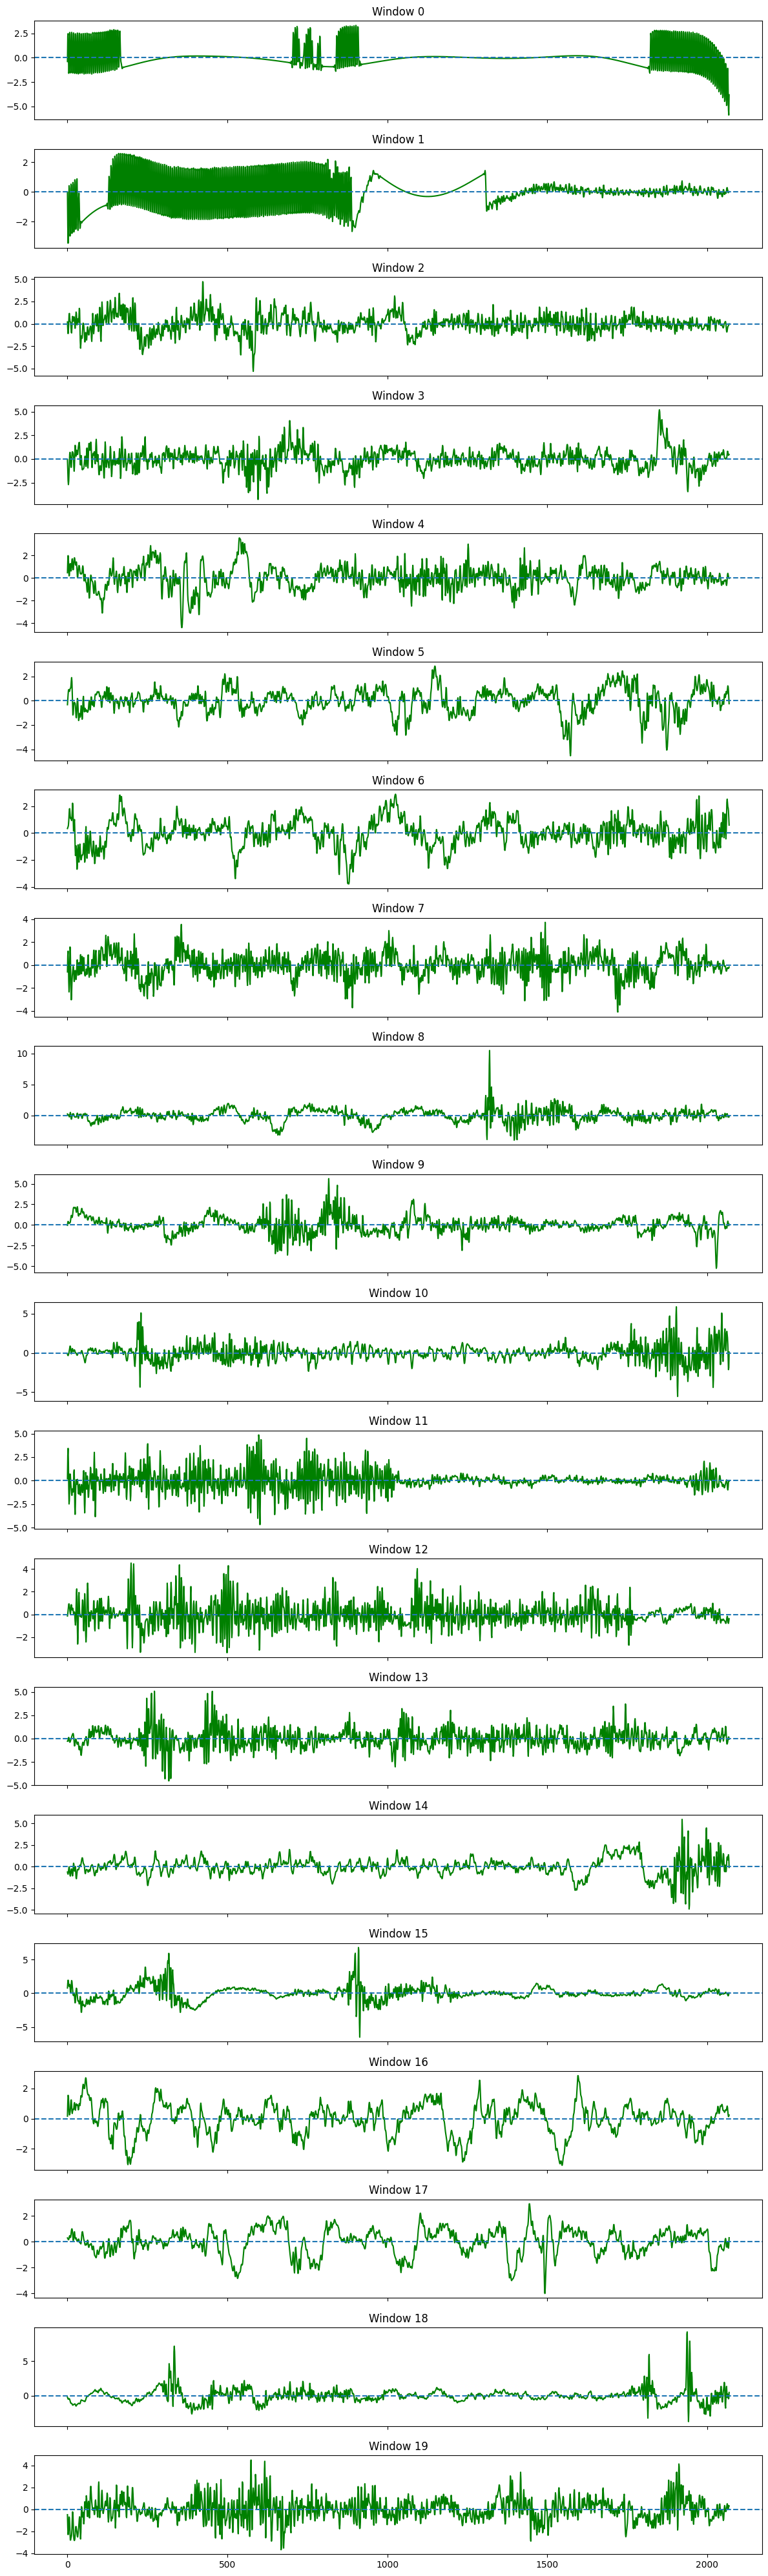

In [22]:
import matplotlib.pyplot as plt

channel_idx = 1
n_windows_to_plot = 20


fig, axes = plt.subplots(n_windows_to_plot, 1, figsize=(12, 2*n_windows_to_plot), sharex=True)

for i in range(n_windows_to_plot):
    axes[i].plot(X[i, channel_idx],color="green")
    axes[i].set_title(f"Window {i}")
    axes[i].axhline(0, linestyle="--")

plt.tight_layout()
plt.show()

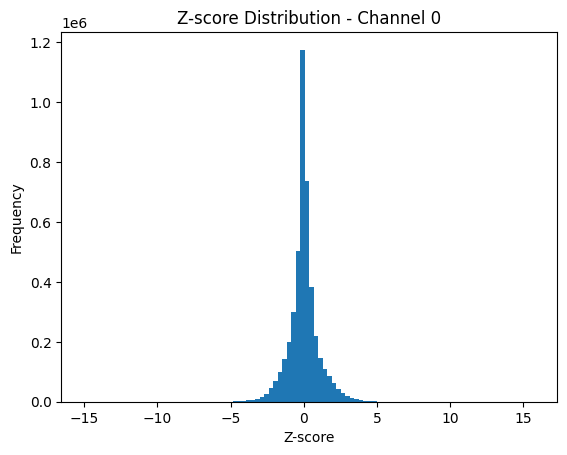

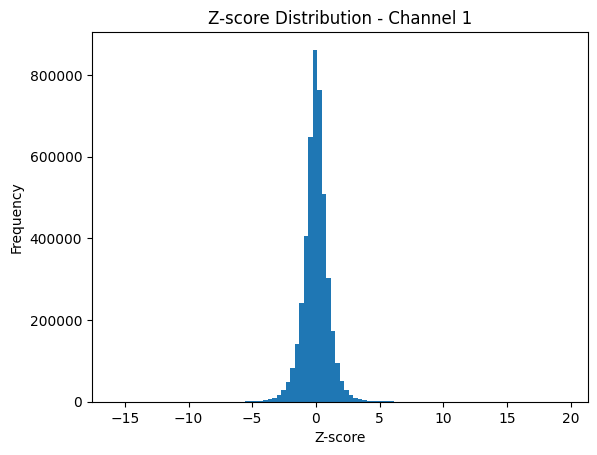

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# -------- Channel 0 --------
channel_0_values = X[:, 0, :].flatten()

plt.figure()
plt.hist(channel_0_values, bins=100)
plt.title("Z-score Distribution - Channel 0")
plt.xlabel("Z-score")
plt.ylabel("Frequency")
plt.show()


# -------- Channel 1 --------
channel_1_values = X[:, 1, :].flatten()

plt.figure()
plt.hist(channel_1_values, bins=100)
plt.title("Z-score Distribution - Channel 1")
plt.xlabel("Z-score")
plt.ylabel("Frequency")
plt.show()

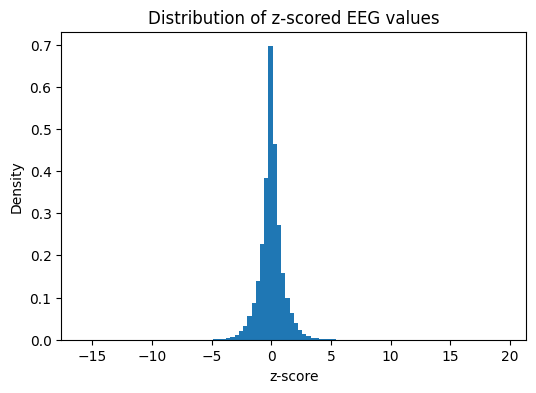

In [23]:
plt.figure(figsize=(6,4))
plt.hist(X.flatten(), bins=100, density=True)
plt.title("Distribution of z-scored EEG values")
plt.xlabel("z-score")
plt.ylabel("Density")
plt.show()

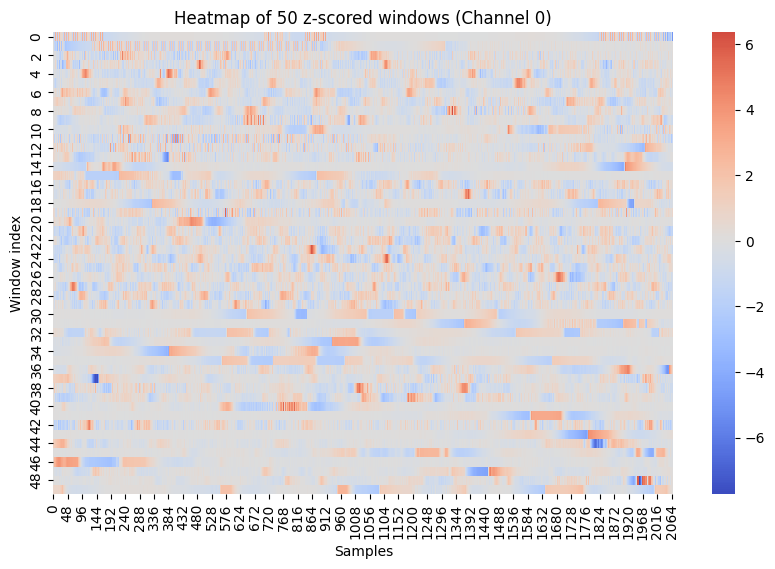

In [26]:
import seaborn as sns

# concatenar varias ventanas de un canal
subset = X[:50, 0, :]  # 50 ventanas del canal 0

plt.figure(figsize=(10,6))
sns.heatmap(subset, cmap="coolwarm", center=0)
plt.title("Heatmap of 50 z-scored windows (Channel 0)")
plt.xlabel("Samples")
plt.ylabel("Window index")
plt.show()

## Checking the unit of uV, cause weird scale

In [24]:
import numpy as np
from scipy.io import loadmat
file_path = "/home/tperezsanchez/FoundationModel_EEG_Dissertation/EEG_data_vis/data/Working/XB47Y/XB47Y_181.mat"
abs_path = os.path.abspath(file_path)
data_XB47Y_181 = loadmat(abs_path)
hdr = data_XB47Y_181["hdr"]

chanunit = hdr["chanunit"][0,0]   # struct field
print("type(chanunit):", type(chanunit))
print("chanunit raw:", chanunit)

# Si es array de strings/objetos, intentamos imprimirlo bonito
try:
    print("chanunit as array:", np.asarray(chanunit))
except Exception as e:
    print("could not np.asarray(chanunit):", e)

chanunit = hdr["chanunit"][0,0]; print(chanunit)
orig = hdr["orig"][0,0]; print(orig.dtype.names)
print(np.percentile(np.abs(np.asarray(data_XB47Y_181["data"])[0].astype(float)), 95))

type(chanunit): <class 'numpy.ndarray'>
chanunit raw: [[array(['uV'], dtype='<U2')]
 [array(['uV'], dtype='<U2')]]
chanunit as array: [[array(['uV'], dtype='<U2')]
 [array(['uV'], dtype='<U2')]]
[[array(['uV'], dtype='<U2')]
 [array(['uV'], dtype='<U2')]]
('VERSION', 'T0', 'HeadLen', 'NRec', 'Dur', 'NS', 'Label', 'Transducer', 'PhysDim', 'PhysMin', 'PhysMax', 'DigMin', 'DigMax', 'PreFilt', 'SPR', 'Cal', 'Off', 'Calib', 'SampleRate', 'Chan_Select', 'ChanTyp', 'AS', 'chansel', 'annotation')
250.2831821733822


In [25]:
import numpy as np

hdr = data_XB47Y_181["hdr"]
orig = hdr["orig"][0,0]

def show_field(name):
    v = orig[name][0,0]
    return np.asarray(v).squeeze()

for f in ["PhysDim","PhysMin","PhysMax","DigMin","DigMax","Cal","Off","Calib","PreFilt","SampleRate","SPR"]:
    if f in orig.dtype.names:
        print(f, "=", show_field(f))

PhysDim = ['uV      ' 'uV      ' '        ']
PhysMin = [-1.37421e+03 -1.37421e+03 -1.00000e+00]
PhysMax = [1.373537e+03 1.373537e+03 1.000000e+00]
DigMin = [ -2048  -2048 -32768]
DigMax = [ 2047  2047 32767]
Cal = [6.71000488e-01 6.71000488e-01 3.05180438e-05]
Off = [-9.99755800e-04 -9.99755800e-04  1.52590219e-05]
Calib = [[-9.99755800e-04 -9.99755800e-04  1.52590219e-05]
 [ 6.71000488e-01  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  6.71000488e-01  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  3.05180438e-05]]
PreFilt = ['HP:0.5Hz LP:48Hz                                                                '
 'HP:0.5Hz LP:48Hz                                                                '
 '                                                                                ']
SampleRate = [207.03105466 207.03105466  57.00855128]
SPR = [207 207  57]


In [26]:
data = np.asarray(data_XB47Y_181["data"]).astype(float)

for ch in range(data.shape[0]):
    x = data[ch]
    x = x[np.isfinite(x)]
    print(
        f"Ch{ch}: min={x.min():.2f}, max={x.max():.2f}, abs95={np.percentile(np.abs(x),95):.2f}, abs99={np.percentile(np.abs(x),99):.2f}"
    )

Ch0: min=-1374.21, max=1373.54, abs95=250.28, abs99=350.26
Ch1: min=-1374.21, max=831.37, abs95=38.92, abs99=85.71


In [28]:
for ch in range(2):
    x = np.asarray(data_XB47Y_181["data"])[ch]
    frac = np.mean(np.abs(x) > 500)
    print(f"Ch{ch}: %(|x|>500uV) = {100*frac:.3f}%")

Ch0: %(|x|>500uV) = 0.046%
Ch1: %(|x|>500uV) = 0.047%


# uil

# Verification of Physical Scaling and Signal Units

## Header Inspection

The `.mat` file header was inspected to determine whether an additional physical sensitivity correction (e.g., digital-to-microvolt scaling) was required prior to analysis.

The `chanunit` field explicitly indicates that both EEG channels are recorded in **microvolts (µV)**.

Key calibration parameters extracted from the header:

- **PhysMin:** ≈ −1374 µV  
- **PhysMax:** ≈ +1374 µV  
- **DigMin:** −2048  
- **DigMax:** +2047  
- **Cal:** ≈ 0.671 µV per digital count  

## Verification of Physical Scaling

The physical scaling factor can be computed as:

scale = (PhysMax − PhysMin) / (DigMax − DigMin)

Substituting the header values:

scale ≈ (1373.537 − (−1374.21)) / (2047 − (−2048))  
scale ≈ 2747.747 / 4095  
scale ≈ 0.671 µV per count  

This matches exactly the calibration coefficient (`Cal ≈ 0.671`) stored in the header, confirming that the digital-to-physical conversion has already been applied.

Importantly, the observed signal amplitude range in the dataset (approximately −1374 µV to +1374 µV) matches the physical limits defined in `PhysMin` and `PhysMax`. This further confirms that the signals are already expressed in physical microvolt units.

## Acquisition-Level Filtering

The header also reports:

PreFilt = HP:0.5Hz LP:48Hz

This indicates that a band-pass filter (0.5–48 Hz) was applied by the recording system prior to storage, consistent with the preprocessing described in the associated publication.

## Conclusion

No additional sensitivity correction or scaling factor was required before analysis.

The EEG signals:

- Are already calibrated in physical microvolts (µV)
- Have undergone digital-to-physical conversion
- Were band-pass filtered (0.5–48 Hz) at acquisition

Therefore, any observed high-amplitude values reflect physiological activity or recording artefacts rather than incorrect unit scaling.

In [ ]:
# DO NOT USE THIS SCRIPT, PROCESS ALL THE FILES, GENERATES LOADS OF IMAGES

import os
import scipy.io as sio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Define paths
input_dir = "/home/tperezsanchez/FoundationModel_EEG_Dissertation/EEG_data_vis/data/Working/XB47Y/"
output_dir = "/home/tperezsanchez/FoundationModel_EEG_Dissertation/EEG_data_vis/results/XB47Y_test2202204/"
plots_dir = os.path.join(output_dir, "plots")

# Ensure directories exist
os.makedirs(output_dir, exist_ok=True)
os.makedirs(plots_dir, exist_ok=True)

# 2. Main Processing Loop
for file_name in df_Unique_match:
    mat_path = os.path.join(input_dir, file_name)
    base_name = os.path.splitext(file_name)[0]
    
    if os.path.exists(mat_path):
        try:
            # LOAD MAT FILE
            mat_contents = sio.loadmat(mat_path)
            header_dict = mat_contents['hdr'] 
            print(f"--- Processing: {file_name} ---")
            
            # A. Convert .mat to Dataframe (Raw)
            _, path, df_eeg = TEEG.build_eeg_array_from_mat(
                hdr=header_dict,
                mat_data=mat_contents,
                output_dir=output_dir,
                file_prefix=base_name,
                save_format="npz",
                return_dataframe=True
            )

            # B. Windowing, Filtering, and Plotting
            # We iterate through the recording in 10s windows
            start_time = df_eeg["Time"].min()
            end_time = df_eeg["Time"].max()
            current_start = start_time
            window_size = 10
            colors = ["steelblue", "darkorange"]
            color_idx = 0

            while current_start + window_size <= end_time:
                current_end = current_start + window_size
                
                # 1. Apply Cutoff (within the specific window)
                df_win_cut = TEEG.apply_amplitude_cutoff(
                    df_eeg, threshold=200, 
                    start_sec=current_start, end_sec=current_end
                )

                # 2. Bandpass Filter
                df_win_idx = df_win_cut.set_index("Time")
                df_win_filt, fs = TEEG.bandpass_filter_eegwin(
                    df_win_idx, lowcut=0.5, highcut=40, order=4
                )

                # 3. Plotting & Saving
                # Ensure plot_eeg_signals is called correctly
                # We add a save logic here
                plt.figure(figsize=(12, 8))
                TEEG.plot_eeg_signals(
                    df_win_filt.reset_index(), 
                    color=colors[color_idx]
                )
                
                # Create a specific filename for this window
                plot_filename = f"{base_name}_win_{int(current_start)}s.png"
                plt.savefig(os.path.join(plots_dir, plot_filename), dpi=150)
                plt.close() # CRITICAL: Close plot to free up memory

                # Toggle color and move to next window
                color_idx = 1 - color_idx
                current_start += window_size

            print(f"Successfully processed and plotted windows for {base_name}")

        except Exception as e:
            print(f"Error in {file_name}: {e}")

print("\nPipeline Complete: NPZ files overwritten and PNG plots generated!")